<a href="https://colab.research.google.com/github/Rickmwasofficial/Learning-Machine-Learning/blob/main/Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with tensorflow



In [ ]:
# Creating data to view and fit
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

## Our data is ambiguous to understand, lets visualize

In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({'X0': X[: ,0], 'X1':X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


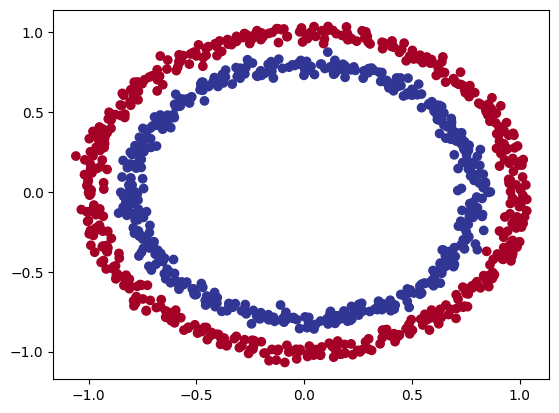

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

### Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### Steps in modelling

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# Creating a binary classificatiomn model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['Accuracy']
)

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - Accuracy: 0.4437 - loss: 4.7821
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.4906 - loss: 0.8939
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.4727 - loss: 0.7241
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Accuracy: 0.4764 - loss: 0.7071
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.4728 - loss: 0.7006


In [ ]:
# Let's try and improve it by trainign for longer
model_1.fit(X, y, epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.4727 - loss: 0.6977
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.4602 - loss: 0.6964
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.4527 - loss: 0.6957
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.4183 - loss: 0.6953
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.4343 - loss: 0.6951
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.4454 - loss: 0.6950
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.4355 - loss: 0.6949
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.4322 - loss: 0.6949
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.4336 - loss: 0.6949
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.4306 - loss: 0.6949
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.4297 - loss: 0.6949
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy:

## Since we are working on a binary classification, and our model is getting about 50% accuracy, the model performs as if it is getting, so let's add a new layer

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model_2.fit(X, y, epochs= 200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5203 - loss: 6.4601
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5455 - loss: 6.9241 
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5505 - loss: 6.7119 
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5135 - loss: 7.5260
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

## Improving the model

In [ ]:

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:

model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5036 - loss: 0.6917


[0.6959296464920044, 0.4869999885559082]

## Visualize the predictions

In [ ]:



import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary by a model predicting on X
  """
  # Define axis boundaries of the plot and craete a meshgrid(Numpy)
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  # Meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max))

  # Create X values, (we are going to make predictions on this)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2d arrays together

  # Make predictions
  y_preds = model.predict(x_in)

  # Check for multiclass
  if len(y_preds[0]) > 1:
    print("Doing Multiclass Classification")
    y_preds = np.argmax(y_preds, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_preds = np.round(y_preds).reshape(xx.shape)

  # Plot the decsion boundary
  plt.contourf(xx, yy, y_preds, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim([xx.min(), xx.max()])
  plt.ylim([yy.min(), yy.max()])


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Binary classification


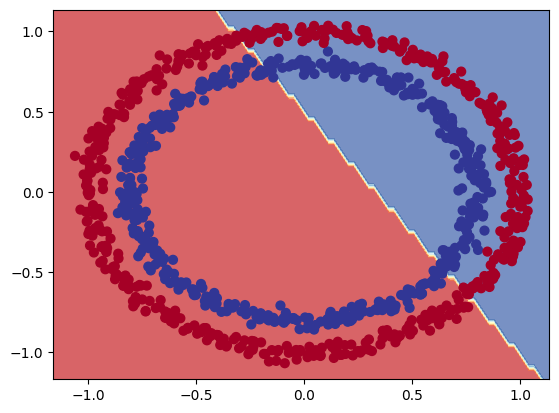

In [ ]:

plot_decision_boundary(model_3, X, y)

## From the plot above we identify that the missing piece is non-linearity

In [ ]:
# create a new model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4693 - loss: 5.1712
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4687 - loss: 4.9497 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4692 - loss: 4.7901
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4642 - loss: 4.7196 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4634 - loss: 4.6953 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4631 - loss: 4.6418 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4590 - loss: 4.6020
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4602 - loss: 4.5882
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4594 - loss: 4.5797
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4595 - loss: 4.5730
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4595 - loss: 4.5616
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accur

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Binary classification


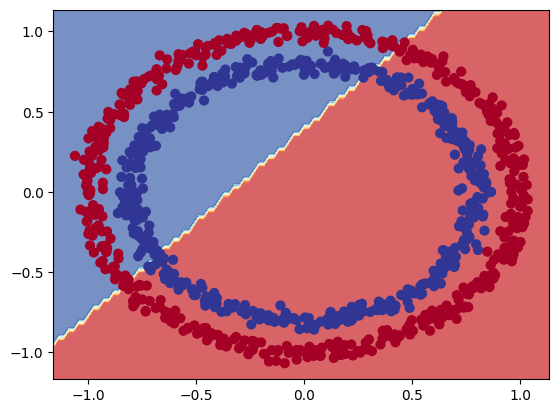

In [ ]:
# check its decision boundary

plot_decision_boundary(model_4, X, y)


## Let's build our network with a non-linear function

In [ ]:
# create a new model
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(7, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_5.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4830 - loss: 0.6906
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6890
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4868 - loss: 0.6877
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4935 - loss: 0.6860
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5106 - loss: 0.6838
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5281 - loss: 0.6810
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5492 - loss: 0.6774
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5685 - loss: 0.6725
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5785 - loss: 0.6657
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6558
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - loss: 0.6408
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Binary classification


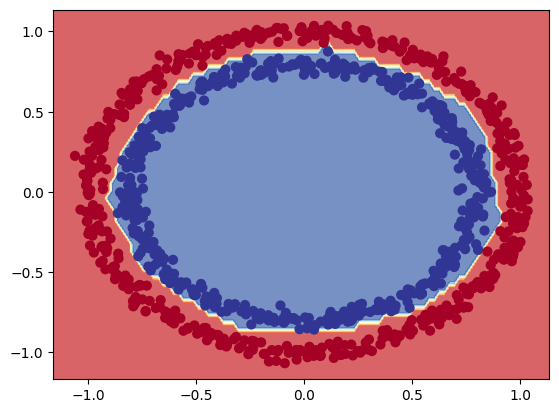

In [ ]:

# check its decision boundary

plot_decision_boundary(model_5, X, y)

### Replicating Non-linear functions from scratch

In [ ]:

# Create a toy tensor similar to the data we pass to our models
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

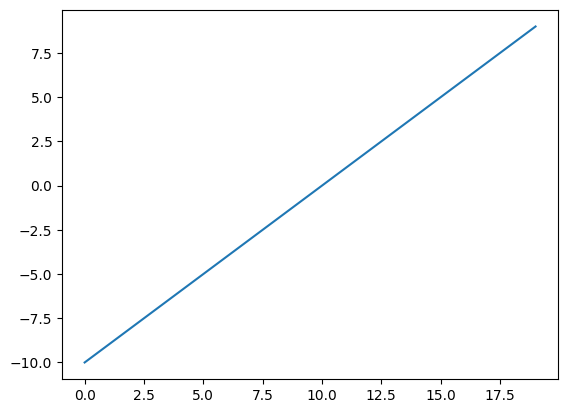

In [ ]:


# Visualize the toy tensor
plt.plot(A)

In [ ]:
# Apply the sigmoid activation function directly to A

# We create a function that replicates sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

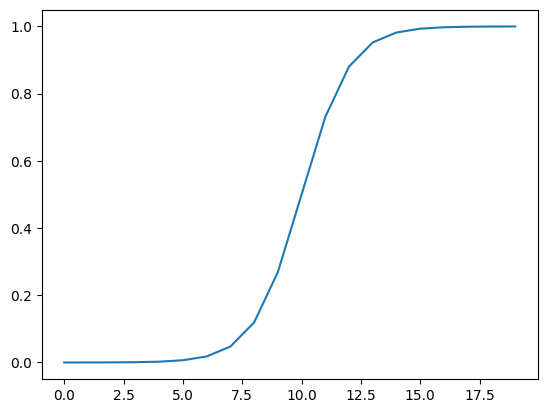

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

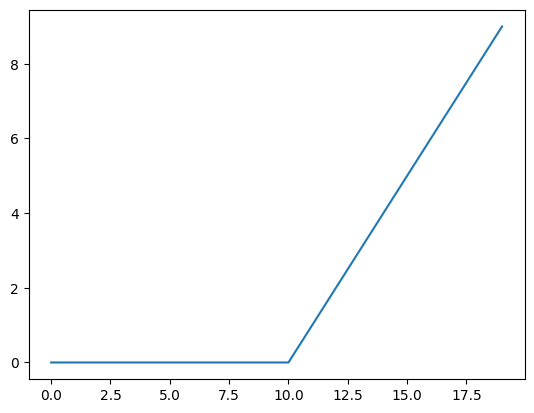

In [ ]:
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
def linear(x):
  return x

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

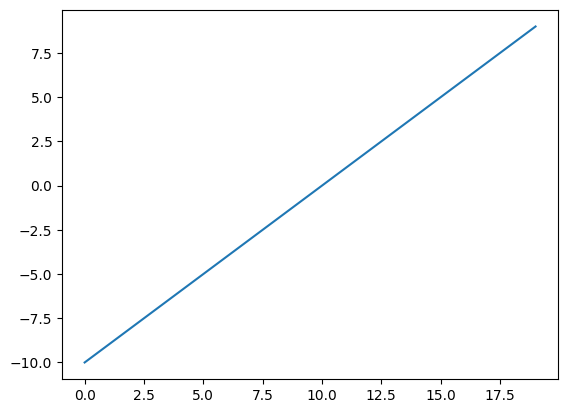

In [ ]:
plt.plot(linear(A))

### Evaluating and imporving our classification model

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
# recreate the model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(7, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

history = model_2.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5116 - loss: 0.6934
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5309 - loss: 0.6928
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5480 - loss: 0.6918
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5358 - loss: 0.6835
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6051 - loss: 0.6471
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6757 - loss: 0.5795
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6778 - loss: 0.5786
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6218 - loss: 0.6071
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7016 - loss: 0.5357
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7186 - loss: 0.5147
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 0.5080  
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7310 - 

In [ ]:
model_2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9793 - loss: 0.0853  


[0.0823919028043747, 0.9800000190734863]

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Binary classification


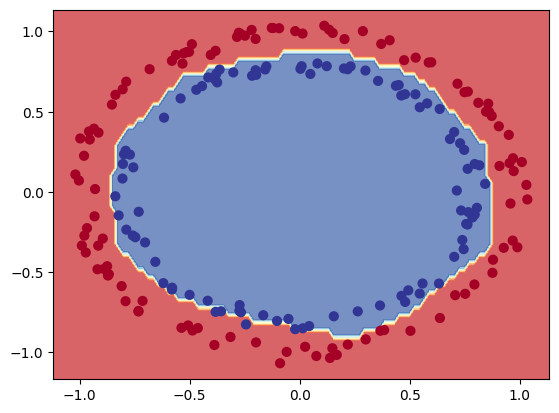

In [ ]:
# Plot the decision boundary
plot_decision_boundary(model_2, X_test, y_test)

### Plot the loss (training) curve

In [ ]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)

,accuracy,loss
0,0.49000,0.693903
1,0.55375,0.692586
2,0.56125,0.690308
3,0.55875,0.678343
4,0.63625,0.634994
5,0.67500,0.583566
6,0.67000,0.587090
7,0.65875,0.585802
8,0.71000,0.537591
9,0.73625,0.507954


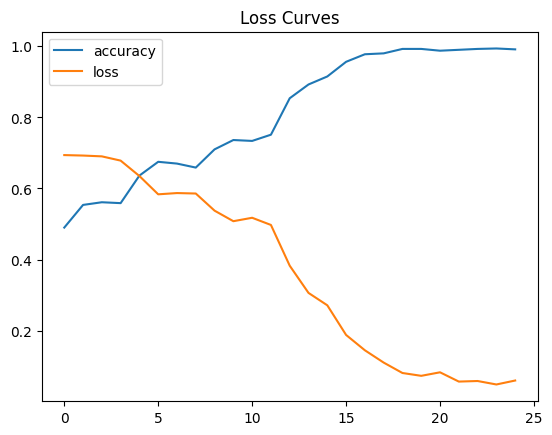

In [ ]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Loss Curves');

### Finding the ideal learning rate

To find the ideal learning rate (where the loss reduces the most) we are going to:


*   Use a learning rate **callback**.This is an extra piece of functionality we can add to the model while it is training
*   A modified loss curves plot



In [ ]:
# Create a new model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(7, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(3, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = 'Adam',
    metrics = ['accuracy']
)
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_3.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4590 - loss: 0.6936 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4497 - loss: 0.6935 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4384 - loss: 0.6935 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4884 - loss: 0.6935 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4884 - loss: 0.6935 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4884 - loss: 0.6935 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4884 - loss: 0.6934 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4884 - loss: 0.6934 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4884 - loss: 0.6934 - learning_

Text(0.5, 0, 'epochs')

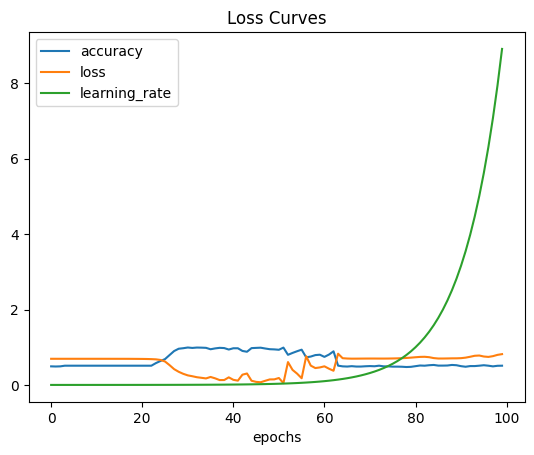

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Loss Curves');
plt.xlabel('epochs')

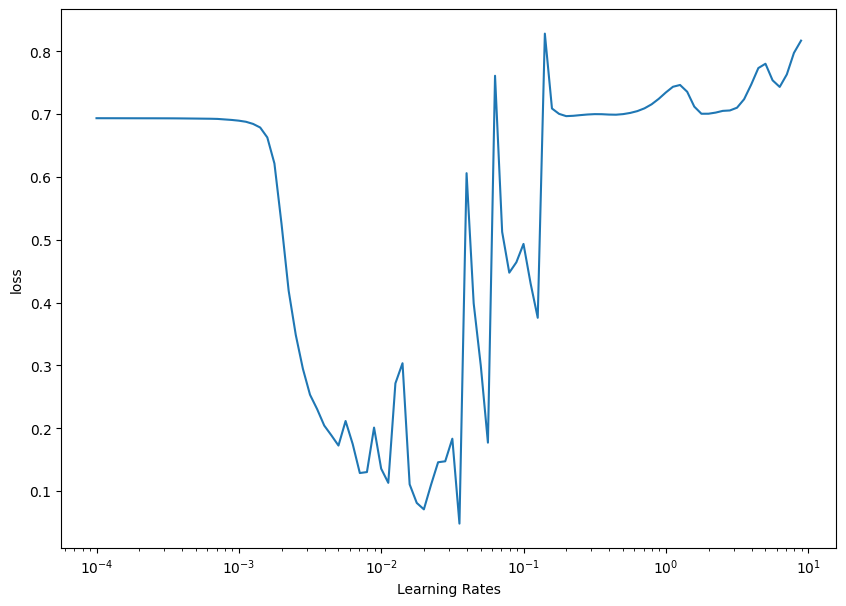

In [ ]:
# plot the loss to the learning rate
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rates')
plt.ylabel('loss')
plt.show()

### From the above we can now build a new model with the learning rate of 0.02

## More classification evaluation methods

In [ ]:
# A confusion Matrix

from sklearn.metrics import confusion_matrix

y_preds = model_2.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10] # They are in binary form i.e 0 and 1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_preds[:10] # They are in continuous form hence the error above

array([[5.6831553e-03],
       [5.1522665e-07],
       [9.4793689e-01],
       [1.2474277e-04],
       [1.0528195e-05],
       [1.5662260e-04],
       [2.7087733e-06],
       [2.0865635e-04],
       [8.3630613e-07],
       [6.2145141e-06]], dtype=float32)

The prediction array has come out in prediction probability form. They standard output from sigmoid or softmax activation functions

In [ ]:
# convert our prediction probabilities to binary format
preds_bin = tf.round(y_preds)

In [ ]:
# Now we create the confusion matrix
conf_mat = confusion_matrix(y_test, preds_bin)
conf_mat

array([[108,   0],
       [  4,  88]])

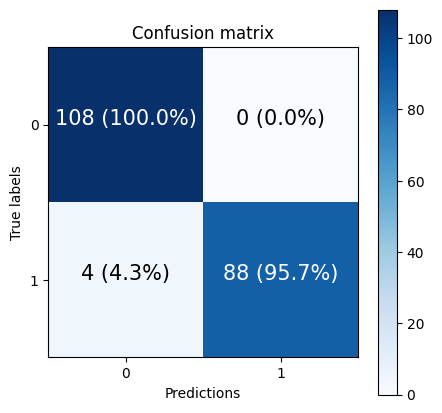

In [ ]:
# Let's make the confusion matrix more visually interesting

import itertools

figsize = (5, 5)

conf_mat = confusion_matrix(y_test, preds_bin)
conf_norm = conf_mat.astype("float")/ conf_mat.sum(axis=1)[:, np.newaxis] # This will normalize our confusion matrix
n_classes = conf_mat.shape[0]

# lets prettify it
fig , ax = plt.subplots(
    figsize=figsize,

)
# create a matrix plot
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create the classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(n_classes)

ax.set(title='Confusion matrix',
       xlabel= 'Predictions',
       ylabel= 'True labels',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       yticklabels= labels,
       xticklabels= labels)

# Set a threshold for different color
threshold = ((conf_mat.max() + conf_mat.min()) / 2.)

# Set axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# plot text in each cell
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
  plt.text(j, i, f"{conf_mat[i, j]} ({conf_norm[i, j]*100:.1f}%)",
      horizontalalignment='center',
      color = 'white' if conf_mat[i, j] > threshold else "black",
      size = 15
)